In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# 随便写一个能自己指定滤波方法的边缘提取器
def EdgeDetection(image, method='Roberts'):
    
    filter_dict = {'Roberts'  : (np.array([[-1,0],
                                           [0,1]],dtype="float32"), 
                                 np.array([[0,-1],
                                           [1,0]],dtype="float32")),
                   'Prewitt'  : (np.array([[-1, 0, 1],
                                           [-1, 0, 1],
                                           [-1, 0, 1]],dtype="float32"),
                                 np.array([[-1, -1, -1],
                                           [ 0,  0,  0],
                                           [ 1,  1,  1]],dtype="float32")),
                   'Sobel'    : (np.array([[-1, 0, 1],
                                           [-2, 0, 2],
                                           [-1, 0, 1]],dtype="float32"),
                                 np.array([[-1, -2, -1],
                                           [ 0,  0,  0],
                                           [ 1,  2,  1]],dtype="float32")),
                   'Laplacian': (np.array([[0 , -1,  0],
                                           [-1,  4, -1],
                                           [0 , -1,  0]],dtype="float32"),
                                 np.array([[-1, -1, -1],
                                           [-1,  8, -1],
                                           [-1, -1, -1]],dtype="float32"))}
    f1, f2 = filter_dict[method]
    
    F1 = cv2.filter2D(image, -1, f1)
    F2 = cv2.filter2D(image, -1, f2)
    
    absF1 = cv2.convertScaleAbs(F1)
    absF2 = cv2.convertScaleAbs(F2)
    
    F = cv2.addWeighted(absF1, 0.5, absF2, 0.5, 0)
    
    F = np.log(1.0+F)
    
    F = cv2.normalize(F, F, 0, 255, cv2.NORM_MINMAX)
    
    return F

# 7. 图像分割

## 7.1 基于边缘的分割方法（边缘检测）

### 7.1.1 老四样 + Laplacian over Gaussian

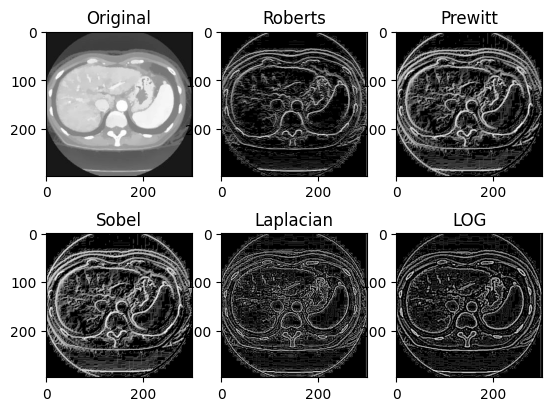

In [8]:
image = cv2.imread('./png_files/liver.png', 0)
G = cv2.GaussianBlur(image, (3, 3), 0)

Roberts = EdgeDetection(image, method='Roberts')
Prewitt = EdgeDetection(image, method='Prewitt')
Sobel = EdgeDetection(image, method='Sobel')
Laplacian = EdgeDetection(image, method='Laplacian')
LOG = EdgeDetection(G, method='Laplacian')

plt.figure()

plt.subplot(231)
plt.title('Original')
plt.imshow(image, cmap='gray')

plt.subplot(232)
plt.title('Roberts')
plt.imshow(Roberts, cmap='gray')

plt.subplot(233)
plt.title('Prewitt')
plt.imshow(Prewitt, cmap='gray')

plt.subplot(234)
plt.title('Sobel')
plt.imshow(Sobel, cmap='gray')

plt.subplot(235)
plt.title('Laplacian')
plt.imshow(Laplacian, cmap='gray')

plt.subplot(236)
plt.title('LOG')
plt.imshow(LOG, cmap='gray')

plt.show()

### 7.1.2 Canny算子

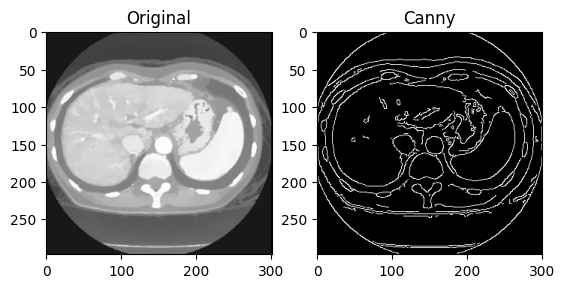

In [11]:
image = cv2.imread('./png_files/liver.png', 0)

C = cv2.Canny(image, 80, 150)

plt.figure()

plt.subplot(121)
plt.title('Original')
plt.imshow(image, cmap='gray')

plt.subplot(122)
plt.title('Canny')
plt.imshow(C, cmap='gray')

plt.show()

边界不连续？

### 7.1.3 霍夫变换

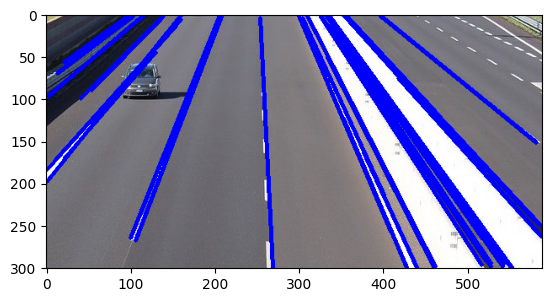

In [25]:
max_slider = 75

img = cv2.imread('./png_files/lanes.png') # road.png is the filename

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the edges in the image using canny detector
edges = cv2.Canny(gray, 50, 200)

# Detect points that form a line
lines = cv2.HoughLinesP(edges, 1, np.pi/180, max_slider, minLineLength=10, maxLineGap=250)

# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
    
# Show result
plt.figure()
plt.imshow( cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )
plt.show()